# NETFLIX EDA
## Task
- Đọc hiểu được bộ dữ liệu
- Làm sạch và xử lý missing values
- Data visualization
- Tổng kết, nhận xét, đọc insight
## 1. Data Loading and Exploration

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
#Reading dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


*phim sản xuất cách đây lâu nhất là từ năm 1925, phim gần nhất là năm 2021*

In [6]:
df.info() #Đếm số dòng có dữ liệu của từng cột và kiểu dữ liệu từng cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


*dữ liệu bị thiếu khá nhiều, cần phải thay thế bằng giá trị khác*  
*cột __date_added__ sai định dạng, cần đổi lại*

In [7]:
df.isnull().sum() # Đếm số dòng null của từng cột

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

*các cột cần xử lý missing values bao gồm: __director__, __cast__, __country__, __date_added__, __rating__, __duration__*

In [8]:
# Adjust 'date_added' column
df['date_added'] = df['date_added'].astype('datetime64[us]')

In [9]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[us]

## 2. Handling missing values
- Các cột __director__, __cast__, __country__, __rating__ sẽ thay các giá trị *null* bằng *unknow*
- Cột __date_added__ sẽ thay bằng giá trị lớn nhất (ngày gần nhất sản xuất phim), có thể chọn cách loại bỏ giá trị null vì dữ liệu bị thiếu khá ít

In [10]:
df.fillna({'director': 'Unknow', 'cast': 'Unknow', 'country': 'Unknow', 'rating': 'Unknow'}, inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
most_recent_entry_date = df['date_added'].max()
df.fillna({'date_added': most_recent_entry_date}, inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [12]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


*check dữ liệu bị thiếu ở cột __duration__ thì thấy có cùng director là __Louis C.K.__ và cột __rating__ đang bị nhầm dữ liệu của cột __duration__*  
*đổi lại dữ liệu từ cột __rating__ sang cột __duration__ và điền unknow và cột __rating__*

In [13]:
# Kiểm tra lại cột director Louis C.K. xem có còn giá trị nào thiếu hay không
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


*không có giá trị nào khác ngoài 3 giá trị bị thiếu, tiến hành xử lý dữ liệu*

In [14]:
# Đổi dũ liệu từ cột rating sang cột duration
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# Chuyển dữ liệu cột rating thành Unknow
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unknow'
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknow,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknow,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknow,66 min,Movies,The comic puts his trademark hilarious/thought...


In [16]:
# Check lại lần cuối xem còn giá trị null hay không
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 3. Visualization

In [17]:
# Distribution of Movie Types
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

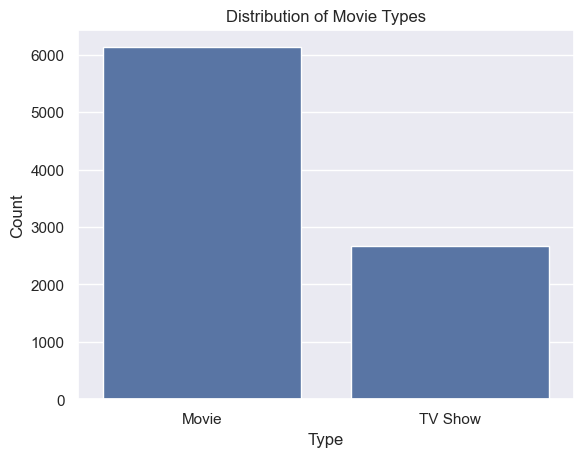

In [18]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Movie Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show;

*Số lượng Movie được Netflix sản xuất nhiều hơn hẳn so với TV Show*

In [19]:
# Top 10 Directors
top_directors = df['director'].value_counts().head(10)
director_unknow = top_directors.max()
top_10_directors = top_directors[top_directors != director_unknow]

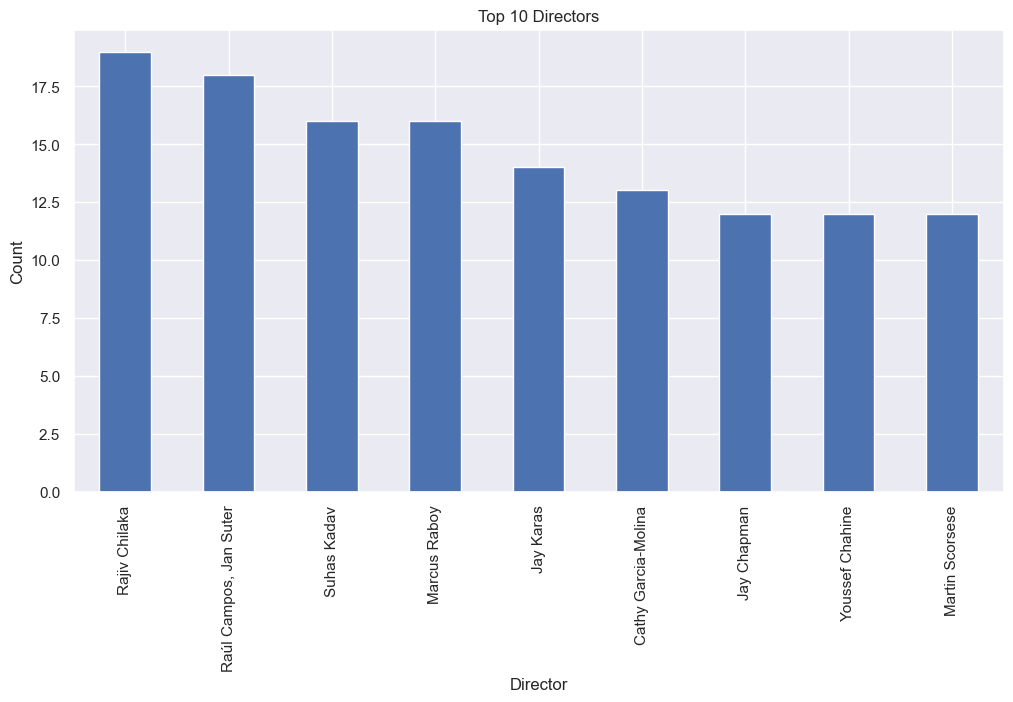

In [20]:
plt.figure(figsize=(12, 6))
top_10_directors.plot(kind='bar')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show;

In [21]:
# Top 10 Casts
top_casts = df['cast'].str.split(',', expand=True).stack().value_counts().head(10)
top_cast_unknow = top_casts.max()
top_10_casts = top_casts[top_casts != top_cast_unknow]
top_10_casts

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Andrea Libman       25
 Paresh Rawal        25
Name: count, dtype: int64

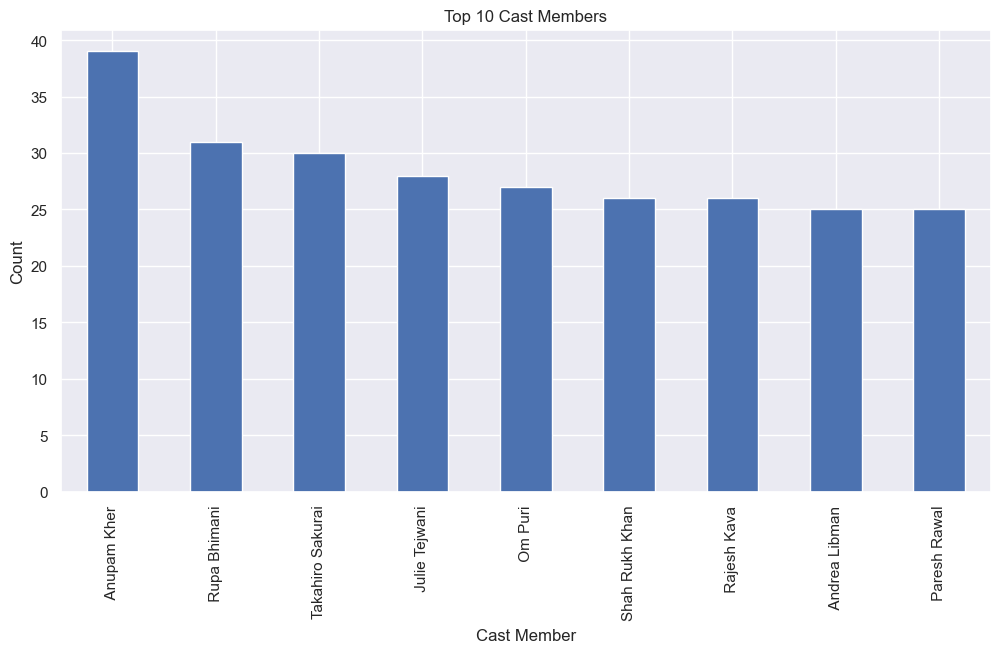

In [22]:
plt.figure(figsize=(12, 6))
top_10_casts.plot(kind='bar')
plt.title('Top 10 Cast Members')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.show()

In [23]:
# Top Country on Netflix
df['country'].value_counts().head(10)

country
United States     2818
India              972
Unknow             831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

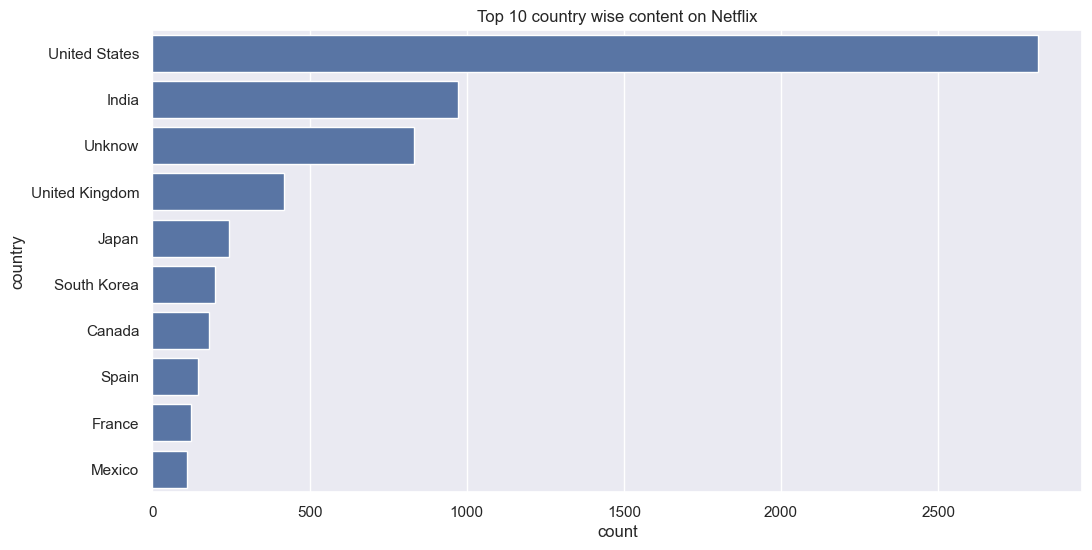

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', order=df['country'].value_counts().index[0:10], data=df)
plt.title('Top 10 country wise content on Netflix');

*Mỹ vẫn là quốc gia đóng góp số lượng phim lớn nhất*

In [25]:
# Type of content based on country
movies_country = df[df['type'] == 'Movie']
tv_show_country = df[df['type'] == 'TV Show']

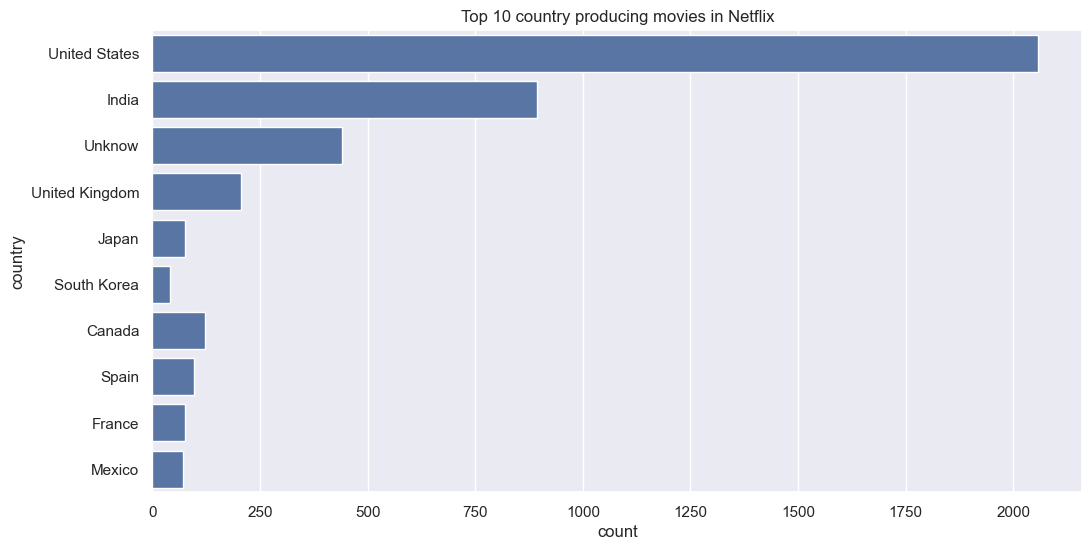

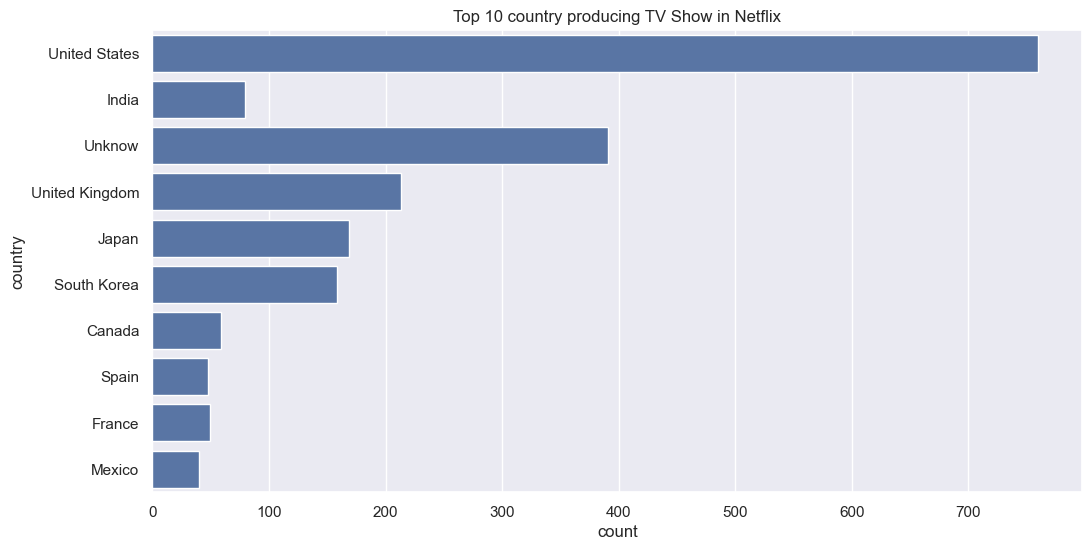

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', order=df['country'].value_counts().index[0:10], data=movies_country)
plt.title('Top 10 country producing movies in Netflix')

plt.figure(figsize=(12,6))
sns.countplot(y='country', order=df['country'].value_counts().index[0:10], data=tv_show_country)
plt.title('Top 10 country producing TV Show in Netflix');

*Ấn Độ chủ yếu sản xuất movie, ngược lại Nhật Bản và Hàn Quốc lại chủ yếu sản xuất TV Show*  
*UK có số lượng movie và TV Show khá đều nhau*

In [27]:
# Top rating
df['rating'].value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

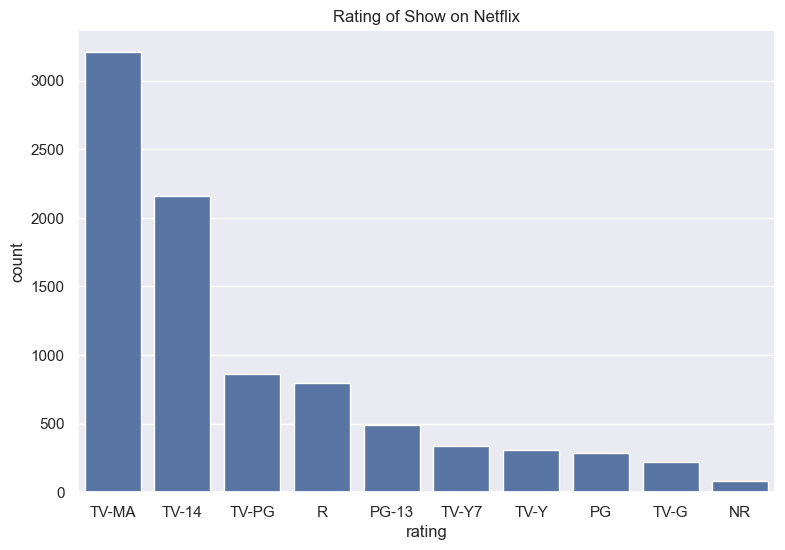

In [28]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating', order=df['rating'].value_counts().index[0:10], data=df)
plt.title('Rating of Show on Netflix');

*phần lớn các show có rating là TV-MA và TV-14*

In [29]:
# Top release year
df['release_year'].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

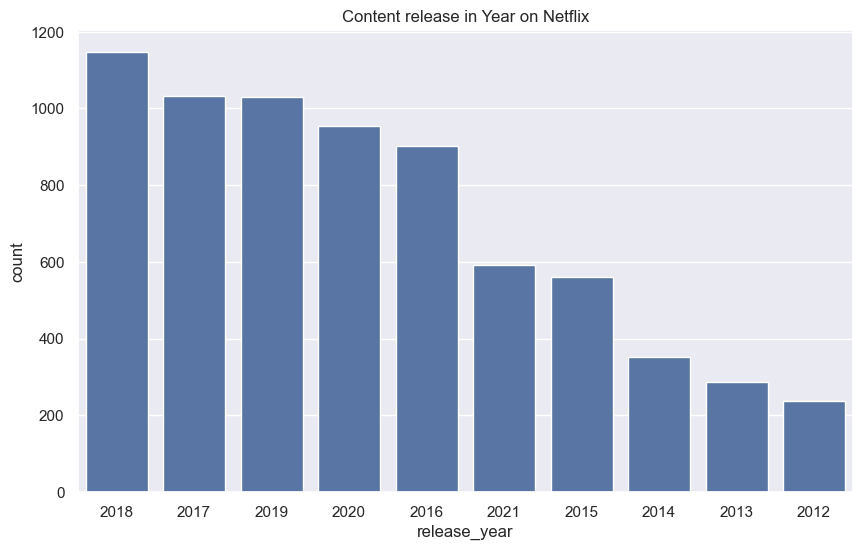

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year', order=df['release_year'].value_counts().index[0:10], data=df)
plt.title('Content release in Year on Netflix');

*trong 5 năm từ 2016 đến 2020, số lượng chương trình được Netflix sản xuất ra tăng mạnh*  
*năm 2021 số lượng có bị giảm, nguyên nhân có thể đến từ đại dịch Covid-19*

In [31]:
top_genres = df['listed_in'].str.split(',', expand=True).stack().value_counts().head(10)
top_genres

 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

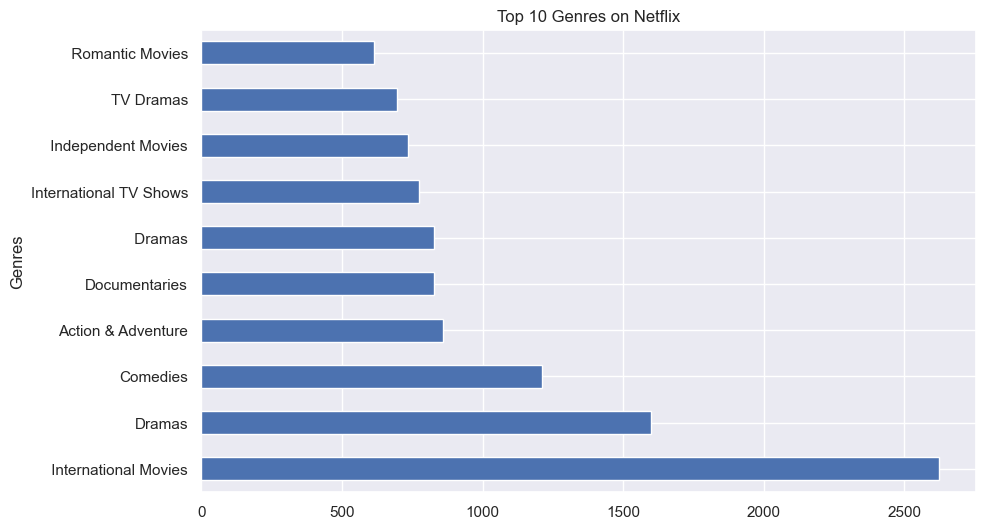

In [32]:
# Popular genres
plt.figure(figsize=(10,6))
top_genres.plot(kind='barh')
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Genres');

*Drama và International Movie là 2 thể loại được xem nhiều nhất trên Netflix*

## Kết Luận
- Netflix ưu tiên sản xuất các nội dung Movie hơn là TV Show
- Mỹ là quốc gia có số lượng Movie và TV Show nhiều vượt trội so với các quốc gia khác
- 2018 là năm Netflix cho ra mắt nhiều nội dung nhất
- Đối tượng mà Netflix hướng đến chủ yếu là người xem trưởng thành
- International Movie và Drama là 2 thể loại được xem nhiều nhất trên Netflix